In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\1-22-10504\AppData\Local\Temp\ipykernel_7248\2042554842.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Carregando o dataset
df = pd.read_csv('aluguel_duas_variaveis_com_ruido.csv')

In [3]:
# Visualizando os primeiros registros do DataFrame
print(df.head())

   Area  Quartos        Preco
0   132        2  3786.649334
1   136        5  4694.382578
2   101        3  3472.955795
3   218        1  5452.604056
4    50        3  2590.143495


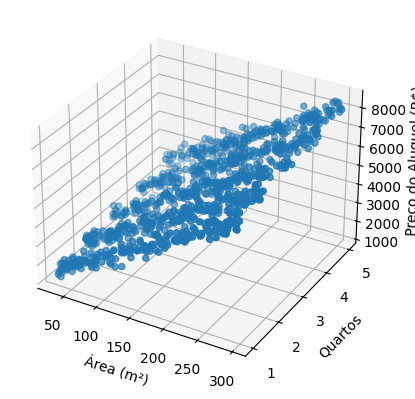

In [4]:

# Explorando a relação entre Área, Quartos e Preço usando plotagem 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Area'], df['Quartos'], df['Preco'])
ax.set_xlabel('Área (m²)')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço do Aluguel (R$)')
plt.show()

In [5]:
# Dividindo o conjunto de dados em treino e teste
X = df[['Area', 'Quartos']]
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Criando e treinando o modelo de regressão linear com ambas as variáveis
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [8]:
# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 55687.03329148516
R² Score: 0.9791797428233109


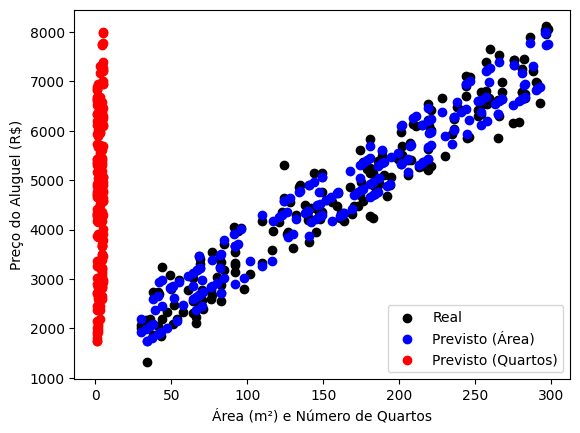

In [9]:
# Visualizando as previsões em relação ao preço real para cada variável explicativa
plt.scatter(X_test['Area'], y_test, color='black', label='Real')
plt.scatter(X_test['Area'], y_pred, color='blue', label='Previsto (Área)')
plt.scatter(X_test['Quartos'], y_pred, color='red', label='Previsto (Quartos)')
plt.xlabel('Área (m²) e Número de Quartos')
plt.ylabel('Preço do Aluguel (R$)')
plt.legend()
plt.show()